In [ ]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import mutations et nb distance
nb_distance = pd.read_csv("BDD_output/bdd_nb_distance.csv")
nb_distance.set_index("idmutinvar", inplace=True)
nb_distance["arrondissement"] = nb_distance["l_codinsee"].astype(str).apply(lambda x : x[3:]+ "e arr"
                                                                          if x[3:].startswith("0") == False
                                                                          else x[4:] + "e arr")
nb_distance = nb_distance.loc[nb_distance['sbati'] != 0]
nb_distance.loc[:,"prixm2"] = nb_distance["valeurfonc"] / nb_distance["sbati"]
nb_distance.drop(["anneemut","datemut"]+
                ["id_parcelles","coor_parcelles","long_parcelles","lat_parcelles","coddep","l_codinsee"]+
                ["valeurfonc","sbati"],
                inplace=True, axis=1)
print(nb_distance.shape)
nb_distance.head()

(114362, 23)


<ipython-input-89-8e35df8ba7cc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nb_distance.loc[:,"prixm2"] = nb_distance["valeurfonc"] / nb_distance["sbati"]
<ipython-input-89-8e35df8ba7cc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nb_distance.drop(["anneemut","datemut"]+


,libtypbien,nb_mat_elem,nb_mat_elem_prive,nb_mat_elem_public,nb_coll_lycee,nb_coll_lycee_prive,nb_coll_lycee_public,nb_cine,nb_cine_plus200,nb_spectacle,...,nb_catering,nb_station_velib,nb_velib,nb_gare_unique,nb_lignes_unique,nb_site_tour,distance_to_center,nb_parc,arrondissement,prixm2
idmutinvar,,,,,,,,,,,,,,,,,,,,,
c9da1b9faf8b06392e6474c5f1b81cb5,UN APPARTEMENT,2,1,1,0,0,0,2,2,2,...,29,2,41,1,1,8,1324.028828,0,1e arr,18181.818182
98378420fe06032ff0bb8732f65abfb6,APPARTEMENT INDETERMINE,0,0,0,1,0,1,4,4,3,...,45,1,30,1,1,10,1109.565562,2,1e arr,46370.023419
f6e371b8394f3b255a65783d3c6532e2,UN APPARTEMENT,0,0,0,1,0,1,2,2,4,...,47,2,55,1,2,10,1168.755147,2,1e arr,10555.555556
9b0e8b7add8c9ce467c367ae2ce9d760,UN APPARTEMENT,2,0,2,1,0,1,5,5,6,...,102,4,114,3,4,7,877.492453,1,1e arr,8666.666667
8eb0235abe056bbda12aec4f285372c5,UN APPARTEMENT,0,0,0,1,0,1,5,5,0,...,49,3,77,0,0,7,933.560856,1,1e arr,10400.000000


In [ ]:
# import dist_min
data_min = pd.read_csv("BDD_output/bdd_min_dist.csv")
data_min.set_index("idmutinvar", inplace=True)
print(data_min.shape)

(114363, 20)


In [ ]:
# merge dans un final dataset
final_data = pd.merge(nb_distance, data_min.filter(regex='^min_dist'), on='idmutinvar', how='left')
print(final_data.shape)

(114362, 31)


FileNotFoundError: [Errno 2] No such file or directory: 'Images/fig1_price_per_quantile_line.png'

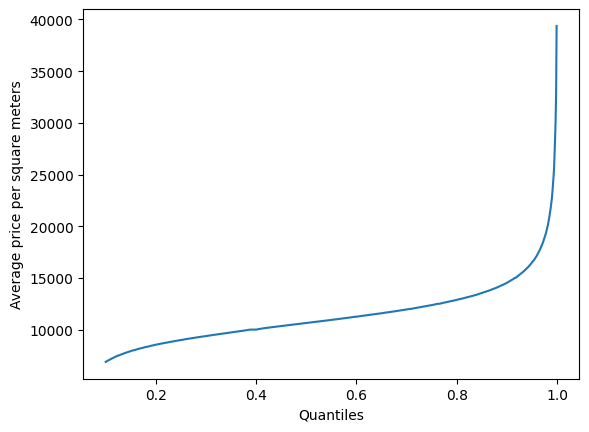

In [ ]:
ax = sns.lineplot(final_data['prixm2'].quantile(np.arange(0.1,1,0.001)), kde=True, bins=30, color='skyblue')
#ax.set(title="Number of sales per housing price",
#       xlabel="Price per squared meter",
#       ylabel="Number of sales"
#       )

[Text(0.5, 1.0, 'Number of sales per housing price'),
 Text(0.5, 0, 'Price per squared meter'),
 Text(0, 0.5, 'Number of sales')]

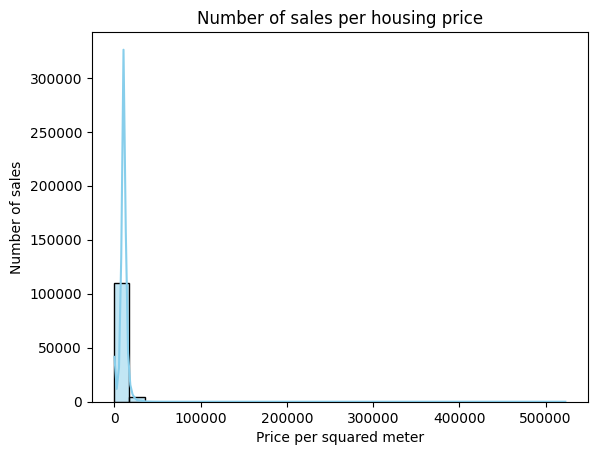

In [ ]:
ax = sns.histplot(final_data['prixm2'], kde=True, bins=30, color='skyblue')
ax.set(title="Number of sales per housing price",
       xlabel="Price per squared meter",
       ylabel="Number of sales"
       )

[Text(0.5, 1.0, 'Number of sales per housing price (max 20 000€ per square meter)'),
 Text(0.5, 0, 'Price per squared meter'),
 Text(0, 0.5, 'Number of sales')]

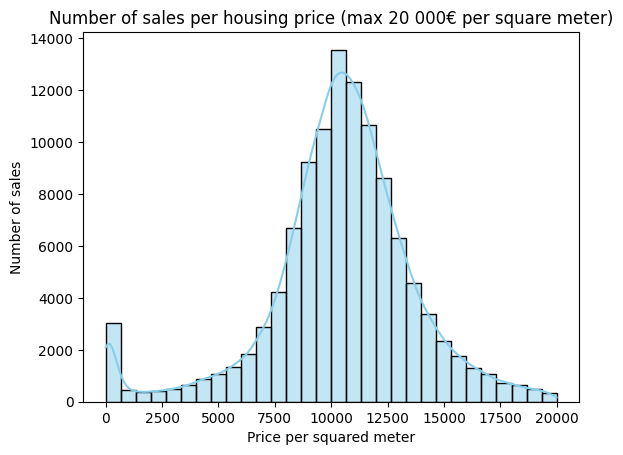

In [ ]:
upper_tsd = 20000
lower_tsd = 6000
ax = sns.histplot(final_data.loc[#(final_data['prixm2'] >lower_tsd) &
                                 (final_data['prixm2'] <upper_tsd),
                                "prixm2"],
                  kde=True, bins=30, color='skyblue')
ax.set(title="Number of sales per housing price (max 20 000€ per square meter)",
       xlabel="Price per squared meter",
       ylabel="Number of sales"
       #xlim=[6000,15000]
       )

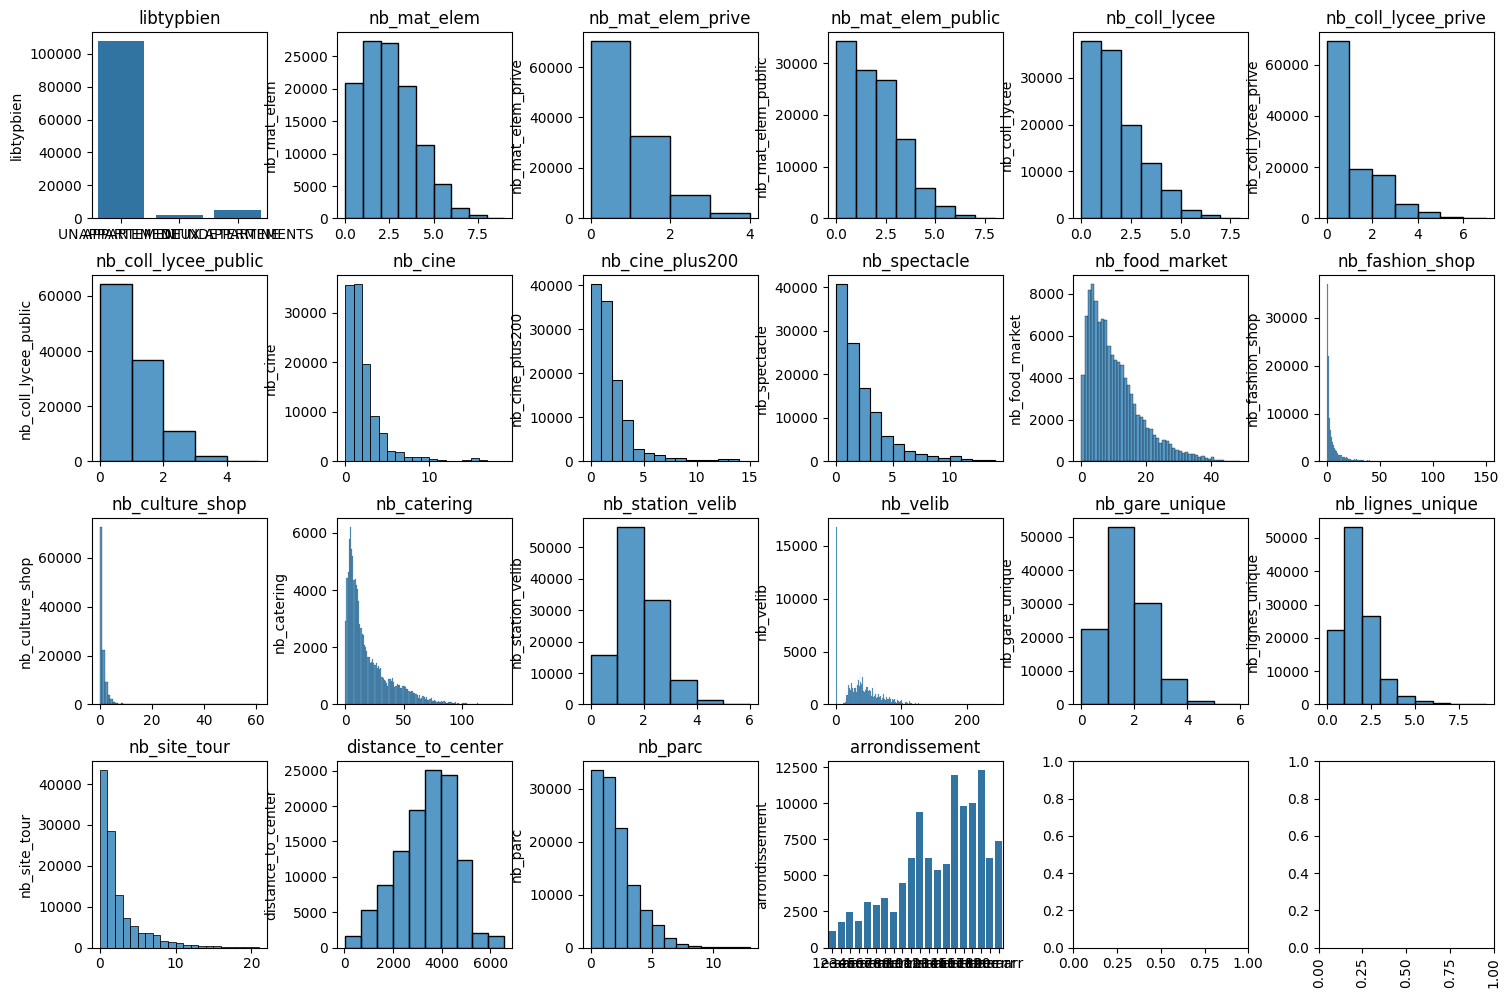

In [ ]:
nrow = 4
ncol = 6

fig, axes = plt.subplots(nrow,ncol, figsize=(15,10), squeeze=False)
fig.tight_layout(pad=2)

for i, var in enumerate(nb_distance.drop("prixm2",axis=1).columns) :
  row = i//ncol; col = i%ncol
  #print(i, row, col)
  if nb_distance.dtypes[var]=='int64' :
    ax = sns.histplot(data=nb_distance, x=var, binwidth=1, ax=axes[row,col])
  elif nb_distance.dtypes[var]=='float64' :
    ax = sns.histplot(data=nb_distance, x=var, bins=10, ax=axes[row,col])
  else :
    ax = sns.countplot(data=nb_distance, x=var, ax=axes[row,col])
    plt.xticks(rotation=90)

  ax.set()
  ax.set(title=var,
         xlabel='',
         ylabel=var,
         )


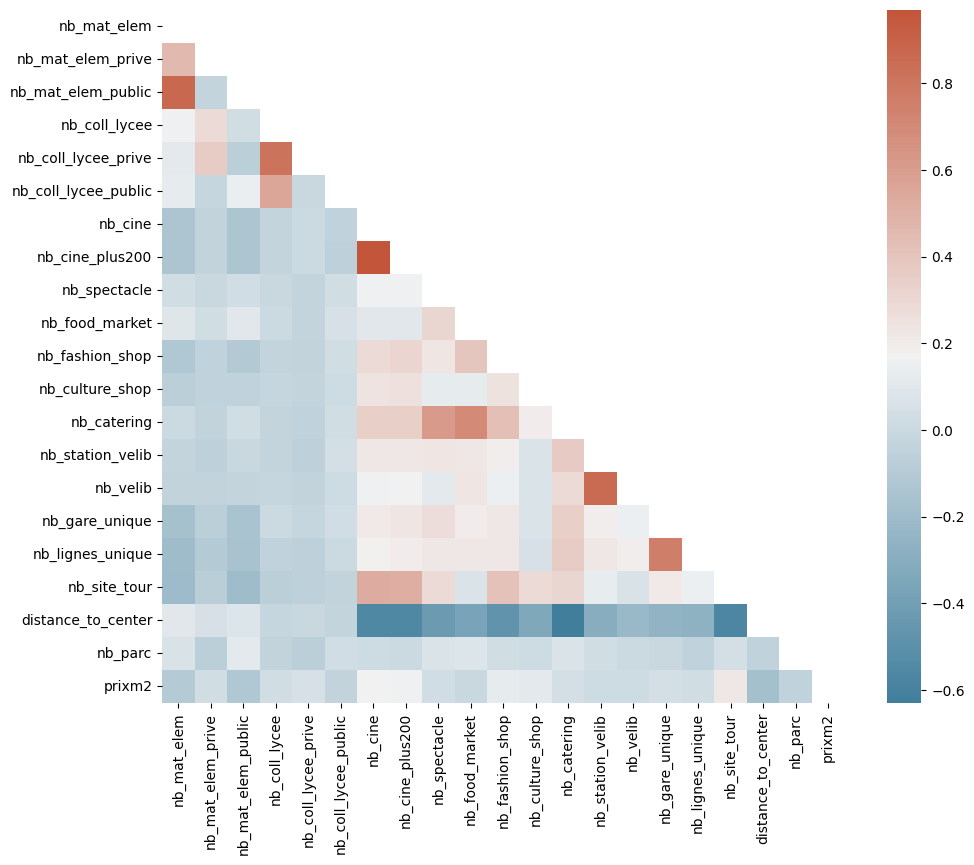

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))

corr_matrix = final_data.iloc[:,:final_data.columns.get_loc("prixm2")+1].select_dtypes(include="number").corr().round(2)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

ax = sns.heatmap(corr_matrix, mask=mask, cmap=cmap)#, annot=True)
